# IVLE Python Clickstream Workshop
-------------------------------
**An entry-level tutorial using Python and its packages to work with the Canvas LMS clickstream data.**

By Jihyun Park (`jihyunp@ics.uci.edu`)<br>
Department of Computer Science, University of California, Irvine<br>
June 2, 2017
(Modified on Aug 25, 2017)


## Outline
-----------------------
### Part 1 : Warm Up
- Basics of List
- Useful functions for string
- Working with folder and file paths
- Dictionary

### Part 2 : Load Data
- Load data from a single csv file
- Load multiple csv files from a folder

### Part 3 : Convert the Data into a Matrix
- numpy arrays
- Transform loaded data to a mtrix

### Part 4 : Save Matrix into a csv File
- Save a matrix into a text .csv file using csv package

### Part 5 : Plotting with `matplotlib.pyplot` 
- Bar plot
- Heatmap

### Part 6 : Different Click Matrices
- Number of homepage/file clicks
- repeat the part 3-5

### Part 7: Students with more/less activities
- Thresholding with `np.where()`
- Re-ordering the rows in a matrix (2D np.array)

<br>

## Requirements
----------------------------
You need to know basic syntax of python language, such as `for ` loop, `if` statements, defining functions (`def`), and etc. 

Python 2.7 should be installed.<br>
The following list of packages should be installed as well. <br>
[Installing python via anaconda](https://www.continuum.io/downloads) can be helpful since it includes all of them!
- Jupyter notebook! (You won't be able to see this if it's not installed)
- numpy
- matplotlib
- datetime
- csv
- os

<br>

# Part 1 : Warm Up
---------------------------

## 1.0 List

In [2]:
# 1. Define a list with values in the first place
lst1 = [1,2,3]
lst2 = ["a", "b", "c"]

In [3]:
# 2. Define an empty list and then append the list
lst3 = []
lst3.append(1)
lst3.append(2)

In [4]:
lst3

[1, 2]

In [5]:
lst1

[1, 2, 3]

Access the list using an index using square brackets

In [6]:
# Index starts from 0
lst3[0]

1

In [7]:
# Put the first element in the lst3 into a variable 'value', and print the 'value'
value = lst3[0]
print value

1


## 1.1 URL, String
### Split function

In [8]:
soe_url = "http://education.uci.edu"
# soe_url = 'http://education.uci.edu'
soe_phd_url = "http://education.uci.edu/phd-in-education.html"

In [9]:
# Try using .split("/") to above strings and print them out
soe_url.split("/")

['http:', '', 'education.uci.edu']

In [10]:
# Save the list as a variable and try printing it out
# Also try printing out the length of the list
split_list = soe_url.split("/")
print len(split_list)
print split_list

3
['http:', '', 'education.uci.edu']


In [11]:
# Function that returns the length of the URL, split with "/"
# Make url as an argument

def get_slash_split_len(url):
    split_list = url.split("/")
    result = len(split_list)
    return result

In [12]:
# Test
get_slash_split_len("a/b/c/d/e")

5

Take a look at the real URLs from the csv files. <br>
We want to categorize the URLs into categories such as 'homepage', 'files', 'assignments' and etc. <br>
The easiest way to do this is take the 5th element of the list, which is the URL split by delimiter "/".

In [13]:
url_file = "https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039"  # -> categorize as "files"
url_assignment = "https://canvas.eee.uci.edu/courses/2230/assignments/49367/submissions"  # -> categorize as "assignments"
url_home = "https://canvas.eee.uci.edu/courses/2230"  # -> categorize as "homepage"

- Homepage : Only 4 slashes exist. We can filter this case out.
- Others : More than 5 slashes exist. 

In [14]:
url_file.split("/")

['https:',
 '',
 'canvas.eee.uci.edu',
 'courses',
 '2230',
 'files',
 '742190?module_item_id=62039']

In [15]:
url_assignment.split("/")[5]

'assignments'

In [16]:
def get_cats_from_url(url):
    """If there are 5 or more slashes, 
       return the 6th element in the array (that we get from .split() function)"""
    if len(url.split("/")) < 6:
        return "homepage"
    else:
        return url.split("/")[5]

In [17]:
# Test
print get_cats_from_url(url_file)
print get_cats_from_url(url_home)

files
homepage


## 1.2 `datetime`

In [18]:
from datetime import datetime, timedelta

In [19]:
dt1 = datetime(2016, 7, 20)
print dt1

2016-07-20 00:00:00


### Extracting date time information and create a datetime object
More information at : https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

In [20]:
# From the string, we want to extract the date and time information.
example_date = "2016-07-24T21:36:07Z"
dt_format = "%Y-%m-%dT%H:%M:%SZ"

dt2 = datetime.strptime(example_date, dt_format)

In [21]:
print dt2
print type(dt2)

2016-07-24 21:36:07
<type 'datetime.datetime'>


In [22]:
dt2 

datetime.datetime(2016, 7, 24, 21, 36, 7)

### `timedelta`

In [23]:
print dt1
print dt2

2016-07-20 00:00:00
2016-07-24 21:36:07


In [24]:
dt_delta = dt2-dt1
print dt_delta

4 days, 21:36:07


In [25]:
dt_delta

datetime.timedelta(4, 77767)

In [26]:
time_diff_days = dt_delta.days
time_diff_secs = dt_delta.seconds
print time_diff_days, "days and ", time_diff_secs, "seconds"

4 days and  77767 seconds


In [27]:
4* 3600*24 + 77767

423367

In [28]:
time_diff_in_seconds = dt_delta.total_seconds()
print time_diff_in_seconds

423367.0


In [29]:
dt1

datetime.datetime(2016, 7, 20, 0, 0)

In [30]:
dt1 + timedelta(0, 3600*8)

datetime.datetime(2016, 7, 20, 8, 0)

## 1.3 Accessing File/Folder Paths

All the folders and files have paths that are similar to URLs. <br>
We can access the files and folders using the paths. 

### List files in a directory :  `os.listdir`

In [33]:
import os
os.listdir("./deidentified_data")

['104500.csv',
 '104716.csv',
 '105751.csv',
 '106707.csv',
 '130996.csv',
 '133180.csv',
 '140533.csv',
 '141747.csv',
 '141925.csv',
 '143914.csv',
 '145670.csv',
 '146863.csv',
 '147718.csv',
 '149531.csv',
 '161048.csv',
 '168272.csv',
 '170223.csv',
 '170432.csv',
 '175489.csv',
 '177681.csv',
 '178174.csv',
 '180174.csv',
 '182504.csv',
 '183023.csv',
 '197521.csv',
 '198967.csv',
 '199241.csv',
 '200213.csv',
 '204748.csv',
 '205399.csv',
 '214859.csv',
 '215400.csv',
 '219450.csv',
 '226412.csv',
 '231943.csv',
 '235765.csv',
 '237519.csv',
 '238015.csv',
 '243861.csv',
 '261820.csv',
 '276402.csv',
 '281031.csv',
 '288266.csv',
 '295360.csv',
 '299868.csv',
 '300495.csv',
 '304461.csv',
 '307656.csv',
 '321628.csv',
 '321917.csv',
 '325700.csv',
 '331387.csv',
 '334203.csv',
 '334953.csv',
 '340310.csv',
 '345089.csv',
 '346931.csv',
 '351132.csv',
 '358425.csv',
 '362123.csv',
 '364842.csv',
 '367687.csv',
 '371246.csv',
 '372017.csv',
 '385563.csv',
 '400323.csv',
 '407162.c

In [34]:
len(os.listdir("./deidentified_data"))

100

### Concatenate folder/file paths : `os.path.join`

You can also do this by string concatenation (using `+`), but this is less confusing and is less prone to errors.

In [35]:
directory = './deidentified_data'
file_name = '199241.csv'
print directory + "/" + file_name

./deidentified_data/199241.csv


In [36]:
os.path.join(directory, file_name)

'./deidentified_data/199241.csv'

## 1.4 Dictionary

Access `value` using `key`. <br>
`key` doesn't have to be an integer as in list.<br>
Let's say we want to have a dictionary where the `key` is a `string` and the `value` is a `list`

In [37]:
# Different ways to define the same dictionary
# 1. Define a dictionary with values in the first place
d = {"a":[1,2,3], "b":[4,5,6]}
print d


{'a': [1, 2, 3], 'b': [4, 5, 6]}


In [38]:

# 2. Define an empty dictionary and then 
d = {} # equivalent to d = dict()
# Access the dictionary like a list
d["a"] = [1,2,3]
d["b"] = [4,5,6]
print d

{'a': [1, 2, 3], 'b': [4, 5, 6]}


### Example
Store the following data into a dictionary where the column "URL" and "created_at" are the `keys`.

| random_id  | URL           | created_at  |
| - |------------- | ----|
| 123  |  https://canvas.eee.uci.edu/courses/2230/files |2016-07-24T21:36:07Z |
| 123  |  https://canvas.eee.uci.edu/courses/2230/    |2016-08-01T17:29:47Z |

In [39]:
d1 = {} 
d1["created_at"] = ["2016-07-24T21:36:07Z", "2016-08-01T17:29:47Z"]
d1["url"] = ["https://canvas.eee.uci.edu/courses/2230/files", "https://canvas.eee.uci.edu/courses/2230/"]

# print d1
print d1.keys()

['url', 'created_at']


In [40]:
# dt_format = "%Y-%m-%dT%H:%M:%SZ"
d2 = {}
d2["created_at"] = [datetime.strptime("2016-07-24T21:36:07Z", dt_format), 
                    datetime.strptime("2016-08-01T17:29:47Z", dt_format)]
d2["url"] = ["https://canvas.eee.uci.edu/courses/2230/files", "https://canvas.eee.uci.edu/courses/2230/"]

print d2['created_at']

[datetime.datetime(2016, 7, 24, 21, 36, 7), datetime.datetime(2016, 8, 1, 17, 29, 47)]


<br>
<br>

# Part 2 : Load Data
---------------------------

## 2.1 Load data from a csv file

In [41]:
import csv

In [42]:
# csv_file = './deidentified_data/104500.csv'

deidentified_data_dir = './deidentified_data'
csv_file = os.path.join(deidentified_data_dir, '104500.csv')  

# Print out the lines that are being read using a csv reader
with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=",")
    for line in reader:
        print line

['roster_randomid', 'url', 'action', 'created_at', 'interaction_seconds', 'remote_ip']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1', 'show', '2016-08-01T17:29:47Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:37Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400', 'show', '2016-08-01T17:29:25Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:02Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230', 'show', '2016-08-01T17:28:51Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1', 'show', '2016-07-27T01:50:13Z', '', '70.209.208.98']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?mod

In [43]:
# Instead of printing the lists out, we are going to put each entry in a list as a variable
with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=",")
    header = reader.next()

    for line in reader:
        rid = int(line[0])
        url = line[1]
        timestamp = line[3]
        ip = line[5]
        print rid, url, timestamp, ip

104500 https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1 2016-08-01T17:29:47Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039 2016-08-01T17:29:37Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400 2016-08-01T17:29:25Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039 2016-08-01T17:29:02Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230 2016-08-01T17:28:51Z 70.209.201.77
104500 https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1 2016-07-27T01:50:13Z 70.209.208.98
104500 https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?module_item_id=62386 2016-07-27T01:50:07Z 70.209.208.98
104500 https://canvas.eee.uci.edu/courses/2230 2016-07-27T01:49:56Z 70.209.208.98
104500 https://canvas.eee.uci.edu/courses/2230/files/748147?module_item_id=62454 2016-07-27T01:06:27Z 70.18

### Things to add
1. Create another key `category` and store the categories using the URL and the function `get_cats_from_url()`.<br>
2. Use `datetime.strptime()` to convert the string into a datetime object, and then store that datetime object instead of string.

In [44]:
dt_format = "%Y-%m-%dT%H:%M:%SZ"

# Declare four lists
url_list = []
category_list = []
time_list = []
ip_list = []

with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    header = reader.next()
    for line in reader:
        rid = int(line[0])
        url = line[1]
        timestamp = datetime.strptime(line[3], dt_format)
        ip = line[-1]
        cat = get_cats_from_url(url)
       
        # Put the values in the list
        url_list.append(url)
        time_list.append(timestamp)
        ip_list.append(ip)
        category_list.append(cat)
     

In [45]:
time_list[:10]

[datetime.datetime(2016, 8, 1, 17, 29, 47),
 datetime.datetime(2016, 8, 1, 17, 29, 37),
 datetime.datetime(2016, 8, 1, 17, 29, 25),
 datetime.datetime(2016, 8, 1, 17, 29, 2),
 datetime.datetime(2016, 8, 1, 17, 28, 51),
 datetime.datetime(2016, 7, 27, 1, 50, 13),
 datetime.datetime(2016, 7, 27, 1, 50, 7),
 datetime.datetime(2016, 7, 27, 1, 49, 56),
 datetime.datetime(2016, 7, 27, 1, 6, 27),
 datetime.datetime(2016, 7, 27, 1, 6, 23)]

In [46]:
print len(category_list), len(url_list), len(ip_list)

319 319 319


Create a dictionary where the keys are "url", "created_at", "ip", and "category",<br>
and the values are the corresponding lists generated above.

In [47]:
student_data = {}
student_data["url"] = url_list
student_data["created_at"] = time_list
student_data["category"] = category_list
student_data["ip"] = ip_list

In [48]:
print student_data.keys()

['url', 'category', 'created_at', 'ip']


In [49]:
print student_data

{'url': ['https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'https://canvas.eee.uci.edu/courses/2230', 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1', 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?module_item_id=62386', 'https://canvas.eee.uci.edu/courses/2230', 'https://canvas.eee.uci.edu/courses/2230/files/748147?module_item_id=62454', 'https://canvas.eee.uci.edu/courses/2230', 'https://canvas.eee.uci.edu/courses/2230/files/748131?module_item_id=62444', 'https://canvas.eee.uci.edu/courses/2230', 'https://canvas.eee.uci.edu/courses/2230/files/748142/download?wrap=1', 'https://canvas.eee.uci.edu/courses/2230/files/748132/download?wrap=1', 'https://canvas.eee.uci.ed

## 2.2 Load multiple csv files from a folder

We have .csv file for each student.<br>
Each csv file has columns `url`, `created_at` (timestamp), `remote_ip` (IP address), and etc.

`student_data1 = {"url":[url1, url2, ...], "created_at":[time1, time2, ...], "remote_ip":[ip1, ip2, ip3, ..], ...}`

Total data will be a dictionary, where the keys are the student ID's and the values are the data of that student (above `student_data`). <br>
If the ID of the first three students were 1,2 and 3, the total data would look something like below.

`data = {1:student_data1, 2:student_data2, 3:student_data3, ...}`

In [50]:
deidentified_data_dir = './deidentified_data'

for filename in os.listdir(deidentified_data_dir):
#     print filename
    csv_file = os.path.join(deidentified_data_dir, filename)
    print csv_file

./deidentified_data/104500.csv
./deidentified_data/104716.csv
./deidentified_data/105751.csv
./deidentified_data/106707.csv
./deidentified_data/130996.csv
./deidentified_data/133180.csv
./deidentified_data/140533.csv
./deidentified_data/141747.csv
./deidentified_data/141925.csv
./deidentified_data/143914.csv
./deidentified_data/145670.csv
./deidentified_data/146863.csv
./deidentified_data/147718.csv
./deidentified_data/149531.csv
./deidentified_data/161048.csv
./deidentified_data/168272.csv
./deidentified_data/170223.csv
./deidentified_data/170432.csv
./deidentified_data/175489.csv
./deidentified_data/177681.csv
./deidentified_data/178174.csv
./deidentified_data/180174.csv
./deidentified_data/182504.csv
./deidentified_data/183023.csv
./deidentified_data/197521.csv
./deidentified_data/198967.csv
./deidentified_data/199241.csv
./deidentified_data/200213.csv
./deidentified_data/204748.csv
./deidentified_data/205399.csv
./deidentified_data/214859.csv
./deidentified_data/215400.csv
./deiden

In [51]:
filename.split(".")[0]

'592464'

In [54]:
### Create a dictionary that will store all the students data!
data = {}
dt_format = "%Y-%m-%dT%H:%M:%SZ"

for filename in os.listdir(deidentified_data_dir):
    
    csv_file = os.path.join(deidentified_data_dir, filename)

    url_list =[]
    category_list = []
    time_list = []
    ip_list = []
    
    rid = int( filename.split(".")[0]  )
    
    with open(csv_file, 'r') as f:
        reader = csv.reader(f, delimiter=",")
        header = reader.next()
        
        for line in reader:
#             rid = int(line[0])
            url = line[1]
            timestamp = datetime.strptime(line[3], dt_format)
            ip = line[5]
            cat = get_cats_from_url(url)
            
            url_list.append(url)
            category_list.append(cat)
            time_list.append(timestamp)
            ip_list.append(ip)
    
    student_data = {"url":url_list, "created_at":time_list, "ip":ip_list, "category":category_list}
    
    # Save "student_data" dict (each student's data) to the "data" dictionary
    # where the key is the student's random ID 
    data[rid] = student_data

In [55]:
data.keys()

[345089,
 231943,
 288266,
 568332,
 578062,
 177681,
 480786,
 200213,
 358425,
 149531,
 538148,
 145670,
 409639,
 143914,
 591403,
 371246,
 462383,
 104500,
 432697,
 491579,
 133180,
 325700,
 367687,
 199241,
 592464,
 205399,
 321628,
 571486,
 141925,
 334953,
 226412,
 482931,
 548808,
 407162,
 331387,
 170432,
 362123,
 243861,
 385563,
 589476,
 518321,
 455346,
 261820,
 170223,
 106707,
 571608,
 531161,
 300495,
 182504,
 183023,
 235765,
 147718,
 556811,
 104716,
 453902,
 105751,
 161048,
 498458,
 364842,
 372017,
 346931,
 198967,
 411700,
 219450,
 508735,
 214859,
 304461,
 168272,
 340310,
 450617,
 299868,
 475486,
 215400,
 238015,
 334203,
 321917,
 175489,
 557446,
 429492,
 197521,
 438165,
 438171,
 351132,
 146863,
 276402,
 141747,
 130996,
 499769,
 140533,
 295360,
 400323,
 281031,
 307656,
 204748,
 180174,
 237519,
 507347,
 529371,
 575990,
 178174]

In [56]:
# Try accessing a single student's data using "data" dictionary and student's random id
data[104500]["url"][0]

'https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1'

<br>
<br>

# Part 3 : Convert the data into a matrix
-------------------------------

We want to convert the whole data as a matrix where the rows are the students and the columns are the days,<br>
and each value in a matrix is a **number of click events per day for each student**.

## `numpy` array

In [57]:
import numpy as np

In [58]:
list_2d = [[1,2,3], [4,5,6]]
# list_2d[0][0]
np.array(list_2d)

array([[1, 2, 3],
       [4, 5, 6]])

#### `np.array` is useful when initialization is needed
- `np.zeros()` : Initializing numpy arrays to zeros
- `np.ones()` : Initializaing numpy arrays to ones

In [59]:
# np.zeros((2,3))
np.ones((5,6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [60]:
np.zeros(50)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Create an array for a single student first. 

In [61]:
# For a single student 
student_data = data[104500]

max_days = 50
first_day = datetime(2016 ,6 ,13 ,0 ,0 ,0)

# n^th entry in this array corresponds to the 
# number of clicks per day on the n^th day since the first day
nclicks_per_day = np.zeros(max_days, dtype=np.int32)

# number of all clicks
for time in student_data['created_at']:
    delta = time - first_day
    if 0 <= delta.days < max_days:
        nclicks_per_day[delta.days] += 1
#         nclicks_per_day[delta.days] = nclicks_per_day[delta.days] + 1

In [62]:
nclicks_per_day

array([ 0,  0,  0,  0,  0,  0,  0,  7,  0, 25,  2, 11,  4,  4,  2,  9, 12,
       17,  3,  1, 13,  0,  4, 10,  0,  6,  0,  0,  8,  5,  2,  5,  5,  4,
       38, 33, 17,  6, 15,  7,  5, 11,  3, 13,  7,  0,  0,  0,  0,  5], dtype=int32)

Make it as a function

In [63]:
def get_nclicks_per_day(student_data, max_days=50, first_day=datetime(2016,6,13,0,0,0)):
    nclicks_per_day = np.zeros(max_days, dtype=np.int32)

    """Fill in the body of the function"""
    for time in student_data['created_at']:
        delta = time - first_day
        if 0 <= delta.days < max_days:
            nclicks_per_day[delta.days] += 1
            
    return nclicks_per_day

In [64]:
# Test the above function
get_nclicks_per_day(data[104716])

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0, 10, 16, 71,  4,  1,
        3,  0,  3,  7,  3,  1,  9,  5,  0,  9,  1, 12,  0, 14,  9,  0,  0,
        0, 10,  0,  9, 20,  0,  1,  4,  7, 12,  2,  0,  4,  0,  1,  0], dtype=int32)

Use the above function and generate a matrix with size (n_students, max_days) for all student data. 

In [65]:
n_students = len(data)
n_students = len(data.keys())
max_days = 50

# Each row of this matrix corresponds to each student,
# and each column is the days since the first day
nclicks_per_day_mat = np.zeros((n_students, max_days)) #, dtype=np.int32)

idx = 0
for rid in data.keys():
    nclicks_per_day_mat[idx,:] = get_nclicks_per_day(data[rid])
#     nclicks_per_day_mat[idx] = get_nclicks_per_day(data[rid])
    idx += 1 # idx = idx + 1

In [66]:
for idx, rid in enumerate(data.keys()):
    nclicks_per_day_mat[idx] = get_nclicks_per_day(data[rid])

Same as above, but now we will create two additional mapping data structures: <br>
`index2id` that maps the index to the random ID,  and `id2index` that maps random ID to the index.  Index starts from 0 to (n_students-1).

These will be useful when working with the matrix, where each row is a student with index=row index.

In [69]:
id2index = {}  # dictionary with keys : random id , value : index
index2id = []  # We don't need to use dictionary here since the index starts from 0.
for idx, rid in enumerate(data.keys()):
    id2index[rid] = idx
    index2id.append(rid)
    nclicks_per_day_mat[idx] = get_nclicks_per_day(data[rid])

In [70]:
nclicks_per_day_mat

array([[  0.,  11.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       ..., 
       [ 44.,  35.,   0., ...,   1.,   0.,   0.],
       [ 15.,   0.,   0., ...,   2.,   0.,   3.],
       [  0.,   0.,  18., ...,  16.,   0.,   0.]])

In [73]:
index2id

[345089,
 231943,
 288266,
 568332,
 578062,
 177681,
 480786,
 200213,
 358425,
 149531,
 538148,
 145670,
 409639,
 143914,
 591403,
 371246,
 462383,
 104500,
 432697,
 491579,
 133180,
 325700,
 367687,
 199241,
 592464,
 205399,
 321628,
 571486,
 141925,
 334953,
 226412,
 482931,
 548808,
 407162,
 331387,
 170432,
 362123,
 243861,
 385563,
 589476,
 518321,
 455346,
 261820,
 170223,
 106707,
 571608,
 531161,
 300495,
 182504,
 183023,
 235765,
 147718,
 556811,
 104716,
 453902,
 105751,
 161048,
 498458,
 364842,
 372017,
 346931,
 198967,
 411700,
 219450,
 508735,
 214859,
 304461,
 168272,
 340310,
 450617,
 299868,
 475486,
 215400,
 238015,
 334203,
 321917,
 175489,
 557446,
 429492,
 197521,
 438165,
 438171,
 351132,
 146863,
 276402,
 141747,
 130996,
 499769,
 140533,
 295360,
 400323,
 281031,
 307656,
 204748,
 180174,
 237519,
 507347,
 529371,
 575990,
 178174]

In [116]:
nclicks_per_day_mat.shape

(100, 50)

In [119]:
arr_3d = np.zeros((3,5,6))
arr_3d.shape

(3, 5, 6)

<br>
<br>

# Part 4 : Save matrix into a csv file

In [120]:
# Use csv.writer()

outfile = './nclicks_per_day_mat.csv'
with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=",")
    writer.writerows(nclicks_per_day_mat)

In [123]:
range(50)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [124]:
header = ['day'+str(i) for i in range(max_days)]

In [129]:
header = []
for i in range(max_days):
    header.append('day'+str(i))

In [130]:
print header

['day0', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9', 'day10', 'day11', 'day12', 'day13', 'day14', 'day15', 'day16', 'day17', 'day18', 'day19', 'day20', 'day21', 'day22', 'day23', 'day24', 'day25', 'day26', 'day27', 'day28', 'day29', 'day30', 'day31', 'day32', 'day33', 'day34', 'day35', 'day36', 'day37', 'day38', 'day39', 'day40', 'day41', 'day42', 'day43', 'day44', 'day45', 'day46', 'day47', 'day48', 'day49']


In [131]:
# if you want to add a column header ['day0', 'day1', 'day2', ...]

outfile = './nclicks_per_day_mat_with_header.csv'
with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(header)
    writer.writerows(nclicks_per_day_mat)

## Save matrix with the random ID in the first column

In [89]:
# First convert the index2id list to the numpy array, and then make it into a column array.
index2id_ar = np.array(index2id)[:, None]

# Concatenate two arrays 1)index2id 2)nclicks_per_day_mat using 'np.concatenate'
nclicks_per_day_mat_rid = np.concatenate((index2id_ar, nclicks_per_day_mat), axis=1)
# Set the array data type to integer
nclicks_per_day_mat_rid = np.array(nclicks_per_day_mat_rid, dtype=np.int) 

In [90]:
# print
nclicks_per_day_mat_rid

array([[345089,      0,     11, ...,      0,      0,      0],
       [231943,      0,      0, ...,      0,      0,      0],
       [288266,      0,      0, ...,      0,      0,      1],
       ..., 
       [529371,     44,     35, ...,      1,      0,      0],
       [575990,     15,      0, ...,      2,      0,      3],
       [178174,      0,      0, ...,     16,      0,      0]])

In [92]:
outfile = './nclicks_per_day_mat_rid.csv'
with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=",")
    writer.writerows(nclicks_per_day_mat_rid)

In [94]:
# With header
header = ['roster_randomid'] + ['day'+str(i) for i in range(max_days)]

outfile = './nclicks_per_day_mat_rid_with_header.csv'
with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(header)
    writer.writerows(nclicks_per_day_mat_rid)

<br>
<br>

# Part 5 : Plotting with `matplotlib.pyplot`

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

### Barplot using `plt.bar()`
documentation : http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar <br>
Plot the average number of clicks per day by student using the above `nclicks_per_day_mat` matrix

In [141]:
avg_nclicks = np.mean(nclicks_per_day_mat, axis=0)
avg_nclicks
avg_nclicks.shape

(50,)

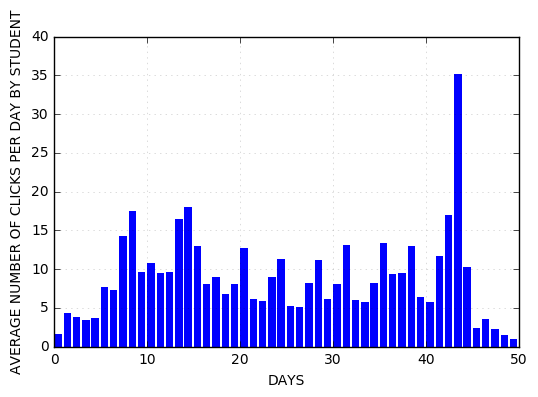

In [153]:

fig = plt.figure(figsize=(6,4))
plt.bar(range(max_days), avg_nclicks, linewidth=0, figure=fig)
plt.xlabel('DAYS')
plt.ylabel('AVERAGE NUMBER OF CLICKS PER DAY BY STUDENT')
plt.grid(alpha=0.2)
# plt.show()
# Save figure
barplot_fname = './barplot.pdf'
plt.savefig(barplot_fname)
# plt.close()

### Plot heatmap using `plt.imshow()`
Documentation : http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow <br>
Plot `nclicks_per_day_mat` matrix

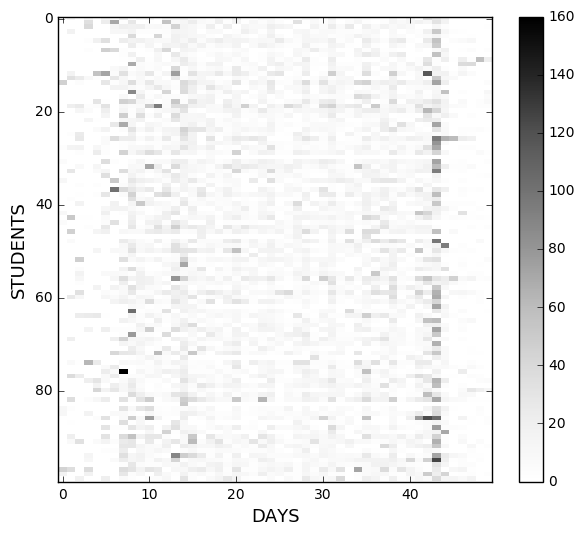

In [139]:
fig = plt.figure(figsize=(7,6))
plt.imshow(nclicks_per_day_mat, interpolation='nearest', aspect='auto', cmap='Greys', figure=fig)
plt.xlabel('DAYS', fontsize=13)
plt.ylabel('STUDENTS', fontsize=13)
plt.colorbar()

## To remove x and y ticks
# plt.xticks([])
# plt.yticks([])


# Save figure
heatmap_fname = './heatmap.pdf'
plt.savefig(heatmap_fname)


In [136]:
plt.close()

<br>
<br>
# Part 6 : Different Click Matrices

Taking subset of the data by data types (e.g. by categories, preview activities.. )

#### Quick introduction to `enumerate` and `zip`

In [154]:
lst = ["a", "b", "c"]
for i, item in enumerate(lst):
    print i, item

0 a
1 b
2 c


In [155]:
lst2 = ["z", "y", "x"]
for item1, item2 in zip(lst, lst2):
    print item1, item2

a z
b y
c x


### Number of *category* clicks for each student 

Use **`get_cats_from_url`** function and **`enumerate`** to get an array of category clicks.
<br>
Note that we need to access both the **timestamp** and the **URL** of the same event. 

In [156]:
nclicks_per_day_cat = np.zeros(max_days, dtype=np.int32)
student_data = data[104500]

for i, time in enumerate(student_data['created_at']):
    cat = get_cats_from_url(student_data['url'][i])
    if cat == "homepage":
        delta = time - first_day
        if 0 <= delta.days < max_days:
            nclicks_per_day_cat[delta.days] += 1

In [157]:
nclicks_per_day_cat

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  9,  1,  5,  0,  2,  0,  3,  3,
        8,  0,  1,  3,  0,  1,  4,  0,  3,  0,  0,  1,  2,  1,  1,  2,  2,
       17, 13,  8,  3,  5,  3,  2,  4,  0,  1,  3,  0,  0,  0,  0,  1], dtype=int32)

In [158]:
nclicks_per_day_cat2 = np.zeros(max_days)

for time, url in zip(student_data['created_at'], student_data['url']):
    cat = get_cats_from_url(url)
    if cat == "homepage":
        delta = time - first_day
        if 0 <= delta.days < max_days:
            nclicks_per_day_cat2[delta.days] += 1

Make it as a function. Use either `zip` or `enumerate`.

In [160]:
# For each student, return a row
def get_nclicks_per_day_cat(student_data, category='homepage', max_days=50, first_day=datetime(2016,6,13,0,0,0)):
    nclicks_per_day_cat = np.zeros(max_days, dtype=np.int32)

    for time, url in zip(student_data['created_at'], student_data['url']):
        cat = get_cats_from_url(url)
        if cat == category:
            delta = time - first_day
            if 0 <= delta.days < max_days:
                nclicks_per_day_cat[delta.days] += 1
    
    return nclicks_per_day_cat

In [163]:
# Test
get_nclicks_per_day_cat(student_data, category='homepage')

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  9,  1,  5,  0,  2,  0,  3,  3,
        8,  0,  1,  3,  0,  1,  4,  0,  3,  0,  0,  1,  2,  1,  1,  2,  2,
       17, 13,  8,  3,  5,  3,  2,  4,  0,  1,  3,  0,  0,  0,  0,  1], dtype=int32)

### Get a matrix of number of *homepage* clicks

In [165]:
n_students = len(data)
max_days = 50

nclicks_per_day_mat_hp = np.zeros((n_students, max_days))

for idx, rid in enumerate(data.keys()):
    nclicks_per_day_mat_hp[idx] = get_nclicks_per_day_cat(data[rid], category='homepage')

In [166]:
nclicks_per_day_mat_hp

array([[  0.,   5.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       ..., 
       [ 15.,  10.,   0., ...,   0.,   0.,   0.],
       [  7.,   0.,   0., ...,   1.,   0.,   1.],
       [  0.,   0.,   4., ...,   8.,   0.,   0.]])

In [167]:
nclicks_per_day_mat

array([[  0.,  11.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       ..., 
       [ 44.,  35.,   0., ...,   1.,   0.,   0.],
       [ 15.,   0.,   0., ...,   2.,   0.,   3.],
       [  0.,   0.,  18., ...,  16.,   0.,   0.]])

### Exercise : Save the matrix

In [168]:
import csv
outfile = './homepage_nclicks_per_day_mat.csv'

with open(outfile, 'w') as f:
    writer = csv.writer(f, delimiter=",")
    writer.writerows(nclicks_per_day_mat_hp)

### Exercise : Plot the matrix using `plt.imshow()`

In [ ]:
fig = plt.figure(figsize=(7,6))
"""Plot the matrix using plt.imshow()"""

<br>
<br>
# Part 7: Students with more/less activities

Split the students in to two different groups by the total number of clicks. <br>
Let's try by simply thresholding using **`np.where()`**. Use the median value as a threshold.

In [ ]:
tot_nclicks = np.sum(nclicks_per_day_mat, axis=1)
print np.max(tot_nclicks), np.min(tot_nclicks), np.median(tot_nclicks)

In [ ]:
thresh = np.median(tot_nclicks)
more_active_idx = np.where(tot_nclicks >= thresh)[0]
less_active_idx = np.where(tot_nclicks < thresh)[0]

Generate two matrices using the two index arrays.<br>
First, we need to concatenate two numpy arrays into a list or a numpy array. We introduce two ways to do this. <br>
- Convert each numpy arrays into a `list`, concatenate them using **+** sign  : `list(a) + list(b)`
- Use `np.concatenate((a,b))` 

In [ ]:
idx_reordered = list(more_active_idx) + list(less_active_idx)
nclicks_per_day_mat_reordered = nclicks_per_day_mat[idx_reordered, :]

Plot the matrix with re-ordered rows.

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.imshow(nclicks_per_day_mat_reordered, interpolation='nearest', aspect='auto', cmap='Greys', figure=fig)
plt.xlabel('DAYS', fontsize=13)
plt.ylabel('STUDENTS', fontsize=13)
plt.colorbar()

The matrix is too white. This is because there are a few entries with very large counts (dark black color), which hides all the granularity of the data. <br>
To have a better look at the data, we can choose a maximum value (threshold) that we want to plot, and set all the values in the matrix higher than the threshold to the value of the threshold.<br>
What would be the adequate value for the threshold?

In [ ]:
# print out the min, max, mean, median values. We can see that the data is very skewed!
print np.min(nclicks_per_day_mat_reordered), np.max(nclicks_per_day_mat_reordered)
print np.mean(nclicks_per_day_mat_reordered), np.median(nclicks_per_day_mat_reordered)

In [ ]:
nclicks_per_day_mat_reordered[np.where(nclicks_per_day_mat_reordered > 100)] = 100

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.imshow(nclicks_per_day_mat_reordered, interpolation='nearest', aspect='auto', cmap='Greys', figure=fig)
plt.xlabel('DAYS', fontsize=13)
plt.ylabel('STUDENTS', fontsize=13)
plt.colorbar()

### Extra exercise
Sort the rows by the number of total clicks, and order the rows from the most active student to the least active student using `np.argsort()`.

In [ ]:
sorted_idx = np.argsort(tot_nclicks)[::-1]
sorted_mat = nclicks_per_day_mat[sorted_idx]

In [ ]:
fig = plt.figure(figsize=(7,6))
plt.imshow(sorted_mat, interpolation='nearest', aspect='auto', cmap='Greys', figure=fig)
plt.xlabel('DAYS', fontsize=13)
plt.ylabel('STUDENTS', fontsize=13)
plt.colorbar()
plt.show()